<a href="https://colab.research.google.com/github/Cosmosfurkan/ML-project/blob/main/D%C3%9CZENL%C4%B0_HAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1-VERİLERİN DRIVE DOSYASINDAN ÇEKİLMESİ**

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

MessageError: ignored

#**KÜTÜPHANELER**
>Proje kapsamında kullanmış olduğumuz Python kütüphanelerini projeye dahil ediyoruz.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#**2-VERİYİ OKUMA**

> Bu kısımda train ve test olan csv uzantılı verilerimizi, pandas kütüphanesinin read_csv komutuyla kolaylıkla okuyabiliyoruz.




In [ ]:
x_train=pd.read_csv("/content/drive/MyDrive/datathon/DATATHON/veriler/train.csv")
x_test=pd.read_csv("/content/drive/MyDrive/datathon/DATATHON/veriler/test_x.csv")


#**3-VERİYİ İNCELEME**
>Bu kısımda ise verilerin içinde herhangi bir boş değer ataması yapılma durumunu inceliyoruz

In [ ]:
print(f"Herbir kolon için x_traindeki boş değer sayısı:\n{x_train.isnull().sum()}\n\n")
print(f"Herbir kolon için x_testdeki boş değer sayısı:\n{x_test.isnull().sum()}")

>info() komutu ile veriye dair önbilgiler elde edebiliyoruz.Kolon isimleri, veri sayıları, veri tipleri aşağıda belirtilmiştir.

In [ ]:
x_train.info()

In [ ]:
x_train.describe()

#Veri Setlerindeki İlk Değerleri İnceleme
>Bu kısımda x_train ve x_test dataframelerinin ilk değerlerini örnek olması için inceliyoruz. Eğer daha fazla veri görmek istiyorsak parantez içindeki değeri değiştirebiliriz.

In [ ]:
x_train.head(1)

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,obek_4,102.936904


In [ ]:
x_test.head(1)

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Erkek,51-60,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,365331.930346,Köy veya Kasaba,Giyim,5566.587664,15.442635,Etmiyor,19.64646


In [ ]:
def obek_analizi(i):
  n=x_train[x_train["Öbek İsmi"]==f"obek_{i}"]
  print(f"BU ORNEK OBEK_{i} İÇİN GEÇERLİDİR\n")
  for i in range(1,14):
    if i in[1 ,2, 3, 4, 5,7, 8,11]:
      print(f"{n.iloc[:,i:i+1].value_counts()}\n\n")
    if i in[6,9,10,13]:
      print(f"{n.iloc[:,i:i+1].mean()}\n")


>fonksiyonun çalışması için herhangi bir öbek sayısı verebiliriz Öbekler 1 den 8 e kadardır

>Bu örnekte ise 1. Öbeğin çıktısını elde ettik

In [ ]:
obek_analizi(1)

BU ORNEK OBEK_1 İÇİN GEÇERLİDİR

Cinsiyet
Kadın       366
Erkek       326
dtype: int64


Yaş Grubu
18-30        174
41-50        169
31-40        159
51-60        134
>60           56
dtype: int64


Medeni Durum
Evli            404
Bekar           288
dtype: int64


Eğitim Düzeyi       
Eğitimsiz               142
Lise Mezunu             134
Ortaokul Mezunu         131
İlkokul Mezunu          123
Doktora Ötesi            42
Yüksekokul Mezunu        35
Üniversite Mezunu        30
Yüksek Lisans Mezunu     29
Doktora Mezunu           26
dtype: int64


İstihdam Durumu               
Düzenli ve Ücretli Bir İşi Var    357
İşsiz veya Düzenli Bir İşi Yok    205
Kendi İşinin Sahibi               127
Emekli                              3
dtype: int64


Yıllık Ortalama Gelir    229513.847974
dtype: float64

Yaşadığı Şehir 
Küçük Şehir        258
Köy veya Kasaba    171
Büyük Şehir        142
Kırsal             121
dtype: int64


En Çok İlgilendiği Ürün Grubu   
Giyim                               

#**4-GRAFİK İLE ANALİZ BÖLÜMÜ**

#A:BAR GRAFİĞİ ANALİZİ

x_trainde bulunan verilerdeki kişilerin eğitim öğretim durumununa göre sıralandığını inceliyoruz

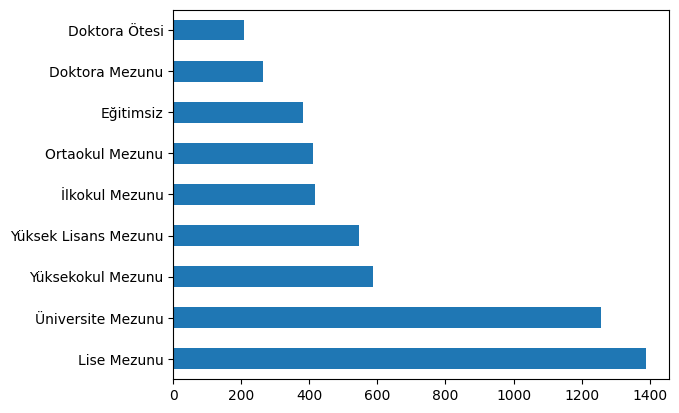

In [ ]:
x_train["Eğitim Düzeyi"].value_counts().plot.barh()   # Eğitim düzeyi değişkeninin frekansları
plt.show()

x_train veri setinde bulunan kişilerin Yıllık sipariş verdikleri ürün sayısına göre istihdam(iş) durumları arasındaki ilişkiyi inceliyoruz.

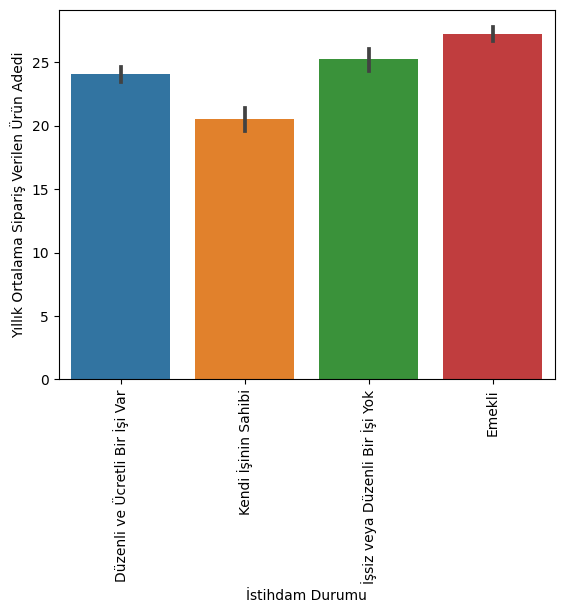

In [ ]:
sbn.barplot(x=x_train["İstihdam Durumu"],y=x_train["Yıllık Ortalama Sipariş Verilen Ürün Adedi"])   # İstihdam durumunun yıllık ortalama sipraiş verilen ürün adedine göre grafiği
plt.xticks(rotation=90);

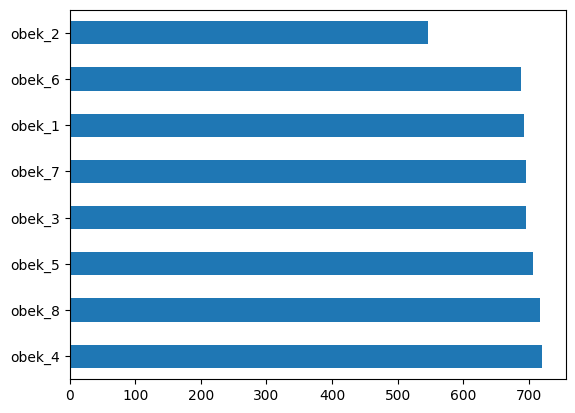

In [ ]:
x_train["Öbek İsmi"].value_counts().plot.barh()   # Öbek İsmi değişkeninin frekansları
plt.show()

#B:AYKIRI GÖZLEM ANALİZİ

> Yıllık Ortalama Sipariş Verilen Ürün Adedini boxplot ile inceledik.

<Axes: xlabel='Yıllık Ortalama Sipariş Verilen Ürün Adedi'>

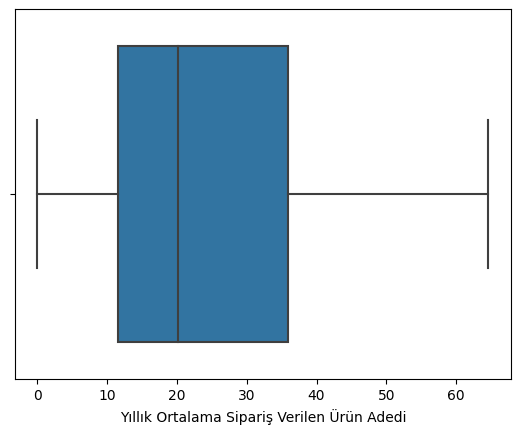

In [ ]:
x_train_say = x_train.select_dtypes(["int64 , float64"])
x_train_sipariş_adedi = x_train["Yıllık Ortalama Sipariş Verilen Ürün Adedi"]
sbn.boxplot(x=x_train_sipariş_adedi)

> Yıllık Ortalama Gelirin boxplot ile analizi.

<Axes: xlabel='Yıllık Ortalama Gelir'>

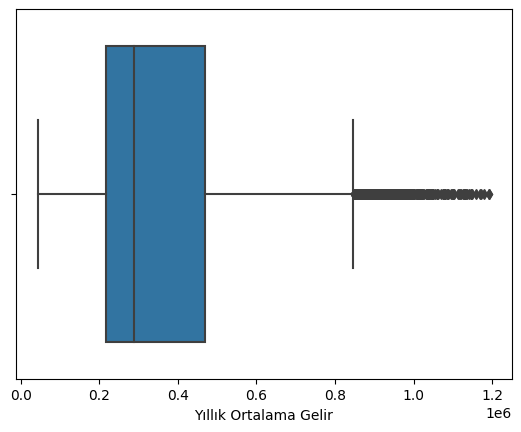

In [ ]:
x_train_yıllık_ort_gelir = x_train["Yıllık Ortalama Gelir"]
sbn.boxplot(x=x_train_yıllık_ort_gelir)

In [ ]:
Q1 = x_train_yıllık_ort_gelir.quantile(0.25)  # 1. çeyreklik
Q3 = x_train_yıllık_ort_gelir.quantile(0.75)  # 3. çeyreklik
IQR = Q3-Q1

print("Q1 değer:" , Q1)
print("Q3 değer:" , Q3)
print("IQR değer:" , IQR)

alt_sınır = Q1 - 1.5*IQR
üst_sınır = Q3 + 1.5*IQR
print("Alt sınır:" , alt_sınır)
print("Üst sınır:" , üst_sınır)

Q1 değer: 215693.43930698355
Q3 değer: 468188.2217975914
IQR değer: 252494.78249060787
Alt sınır: -163048.7344289283
Üst sınır: 846930.3955335033


In [ ]:
aykırı_tf = (x_train_yıllık_ort_gelir > üst_sınır)
x_train_yıllık_ort_gelir[aykırı_tf]
print(x_train_yıllık_ort_gelir[aykırı_tf].count())    # Yıllık Ortalama Gelir'in aykırı değer sayısı

380


#C:AYKIRI GÖZLEM TESPİTİ

Yaş gurubu katagorisinde kişilerin Yıllık Ortalama Gelir ve  Yıllık Ortalama Satın Alım Miktarı arasındaki ilikiye göre dağılımını inceliyoruz.

<Axes: xlabel='Yıllık Ortalama Gelir', ylabel='Yıllık Ortalama Satın Alım Miktarı'>

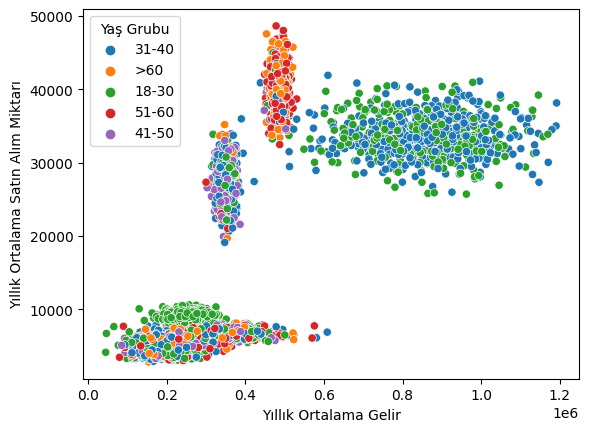

In [ ]:
sbn.scatterplot(x="Yıllık Ortalama Gelir" , y="Yıllık Ortalama Satın Alım Miktarı" , data=x_train , hue="Yaş Grubu")    # Yıllık Ortalama Gelir'in Yıllık Ortalama Satın Alım Miktarı'na göre saçılım grafiği

Cinsiyet katagorisinde kişilerin Yıllık Ortalama Gelir ve Yıllık Ortalama Sipariş Verilen Ürün Adedi arasındaki ilikiye göre dağılımını inceliyoruz.

<Axes: xlabel='Yıllık Ortalama Gelir', ylabel='Yıllık Ortalama Sipariş Verilen Ürün Adedi'>

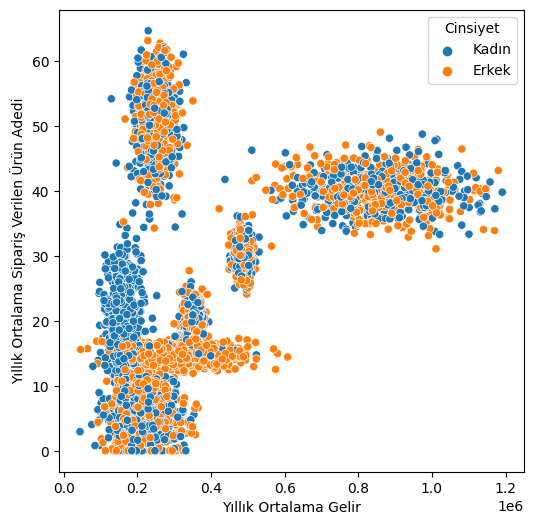

In [ ]:
plt.figure(figsize=(6,6))
sbn.scatterplot(x="Yıllık Ortalama Gelir" , y="Yıllık Ortalama Sipariş Verilen Ürün Adedi" , data=x_train ,hue="Cinsiyet")    # Yıllık Ortalama Gelir'in Yıllık Ortalama Sipariş Verilen Ürün Adedi'ne göre saçılım grafiği

Cinsiyet katagorisinde kişilerin Yıllık Ortalama Gelir ve En Çok İlgilendiği Ürün Grubu arasındaki ilikiye göre dağılımını inceliyoruz.

<Axes: xlabel='Yıllık Ortalama Gelir', ylabel='En Çok İlgilendiği Ürün Grubu'>

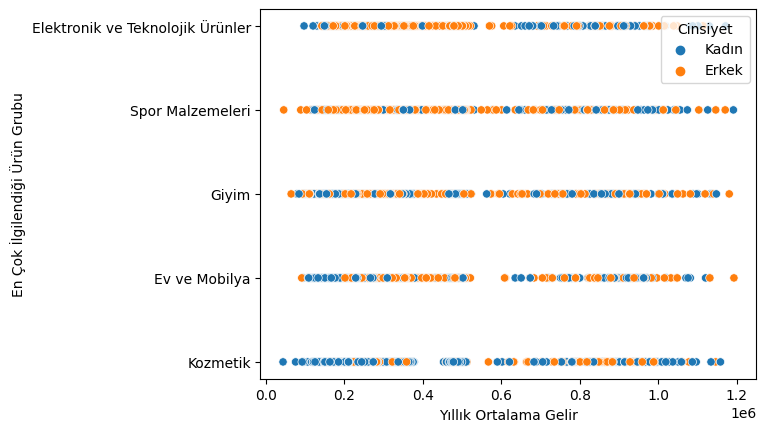

In [ ]:
sbn.scatterplot(x="Yıllık Ortalama Gelir" , y="En Çok İlgilendiği Ürün Grubu" , data=x_train ,hue="Cinsiyet")   # Yıllık Ortalama Gelir'in ve En Çok İlgilendiği Ürün Grubu'nun Cinsiyet ile birlikte saçılım grafiği

<Axes: xlabel='İstihdam Durumu', ylabel='Yıllık Ortalama Satın Alım Miktarı'>

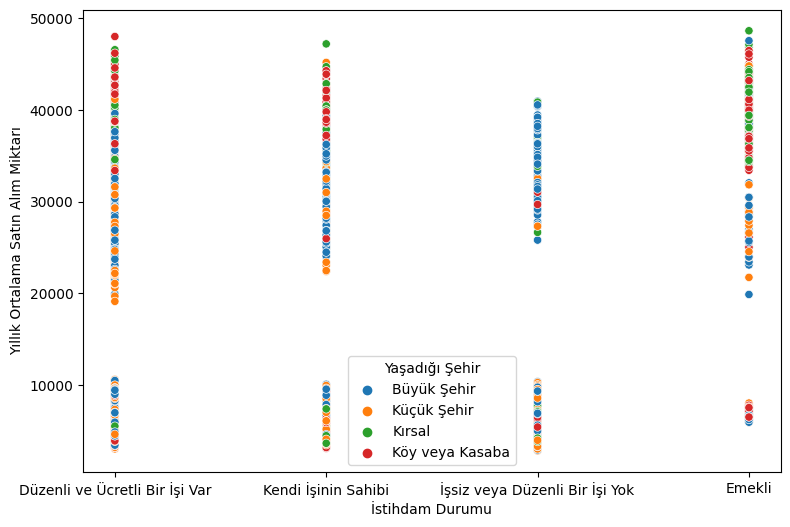

In [ ]:
plt.figure(figsize=(9, 6))

sbn.scatterplot(x="İstihdam Durumu" , y="Yıllık Ortalama Satın Alım Miktarı" , data=x_train ,hue="Yaşadığı Şehir")    # İstihdam Durumur'nun ve Yıllık Ortalama Satın Alım Miktarı'nın Yaşadığı Şehir ile birlikte saçılım grafiği

# D:ISI VE İLİŞKİ GRAFİKLERİ

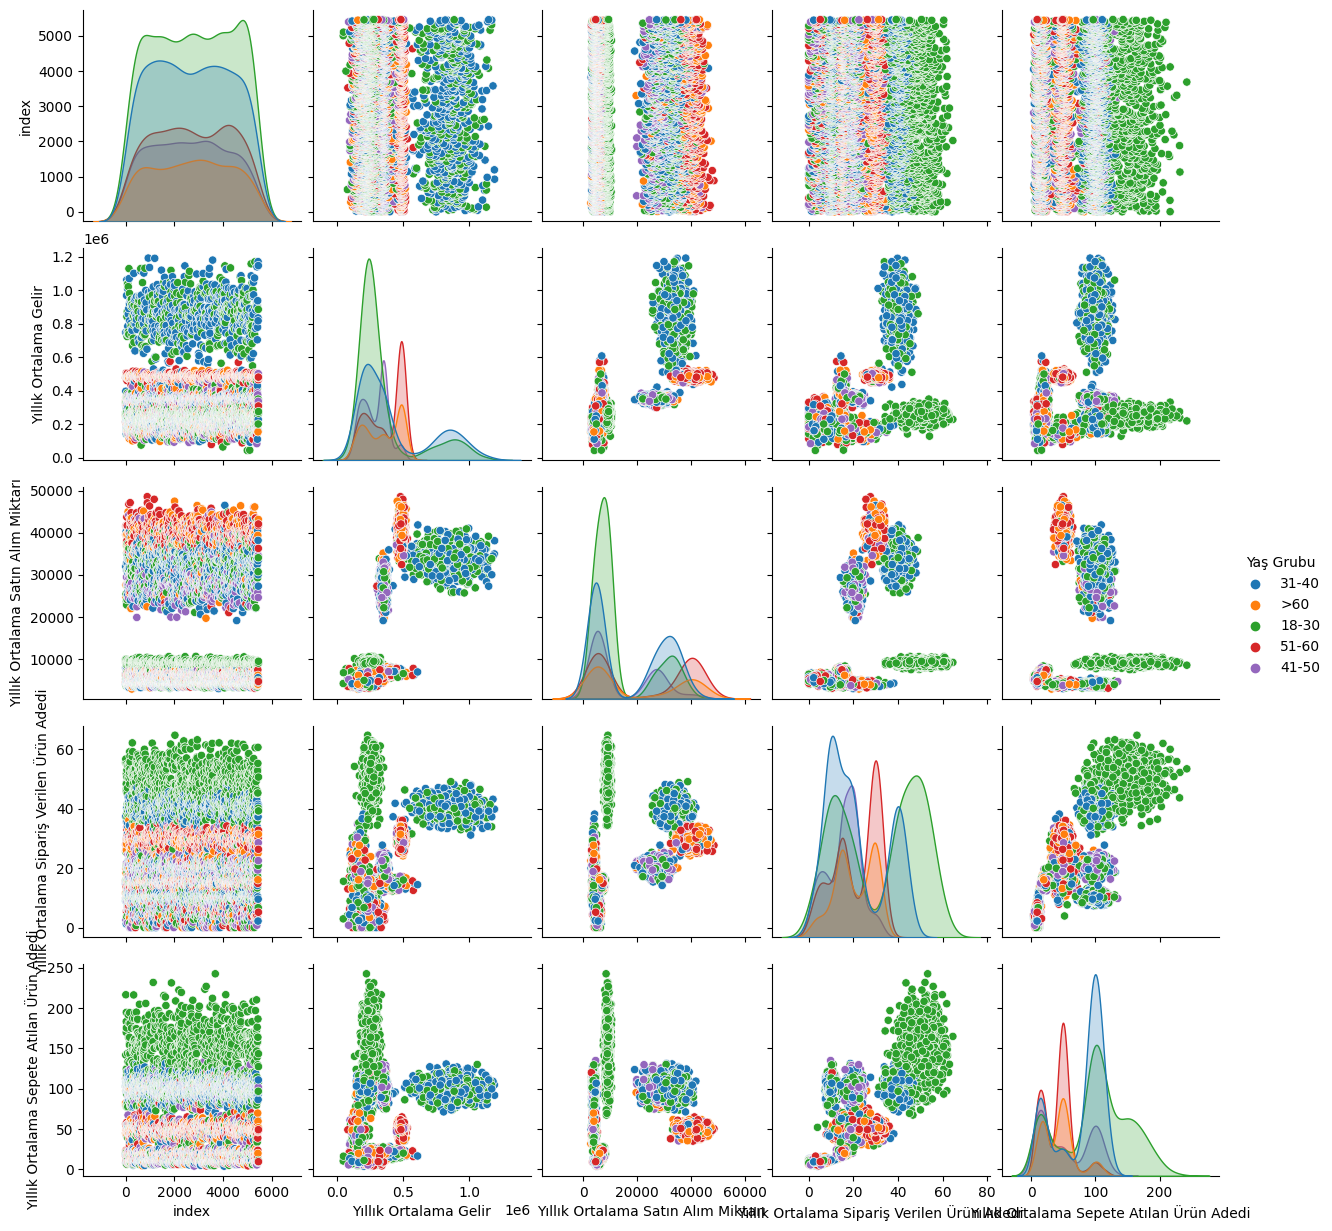

In [ ]:
sbn.pairplot(x_train , hue="Yaş Grubu")   # pairplot ile birlikte her bir değişkenin her bir değişkenle ilişkisini Yaş Grubuna göre gözlemleyebiliyoruz.

<ipython-input-24-6d3ad82d2952>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sbn.heatmap(x_train.corr(), annot=True)   # Değişkenlerin birbirleriyle korelasyonlarını gösteren heatmap


<Axes: >

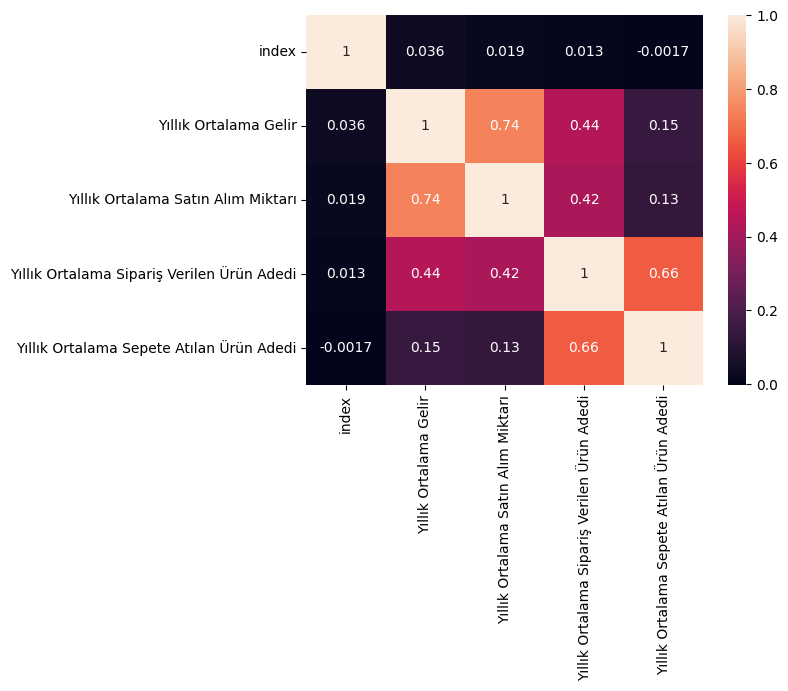

In [ ]:
sbn.heatmap(x_train.corr(), annot=True)   # Değişkenlerin birbirleriyle korelasyonlarını gösteren heatmap


#**5-ÖNİŞLEME BÖLÜMÜ**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

#x_train veri setindeki bazı sütün  verilerinin 0-1 formatına getirilmesi
>Bu kısımda kategorik verileri numerik verilere çeviriyoruz. Bu aşama sayesinde verilerimizi model eğitimine hazırlamış olacağız.
1.  Erkek:0   Kadın:1
2.  Bekar:0   Evli:1
3.  Ediyor:0  Etmiyor:1





In [ ]:
x_train.iloc[:,1]=le.fit_transform(x_train.iloc[:,1])
x_train.iloc[:,3:4]=le.fit_transform(x_train.iloc[:,3])
x_train.iloc[:,11:12]=le.fit_transform(x_train.iloc[:,11])

<ipython-input-27-1d8c5b221c1e>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x_train.iloc[:,1]=le.fit_transform(x_train.iloc[:,1])
<ipython-input-27-1d8c5b221c1e>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x_train.iloc[:,3:4]=le.fit_transform(x_train.iloc[:,3])
<ipython-input-27-1d8c5b221c1e>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-un

>Pandas kütüphanesinin içindeki get_dummies fonksiyonu ile her değişken, 0/1 değişkenlere dönüştürülecek şekilde düzenlenir.
>Parametre olarak veri seti ve hangi kolonları düzenlemek istediğimizi seçiyoruz.

In [ ]:
x_train = pd.get_dummies(x_train, columns=['Yaş Grubu','Eğitim Düzeyi','İstihdam Durumu','Yaşadığı Şehir','En Çok İlgilendiği Ürün Grubu',])

>Alt hücrede görebileceğimiz gibi 'Öbek İsmi' dışında hiçibr şekilde sayısal olmayan bir veri bloğu bulunmamaktadır. Öbek ismini ise bir sonraki aşamada kullanacağız.

In [ ]:
x_train

,index,Cinsiyet,Medeni Durum,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Yaş Grubu_18-30,...,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Büyük Şehir,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Elektronik ve Teknolojik Ürünler,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri
0,0,1,0,748266.440879,32010.900881,37.310644,1,obek_4,102.936904,0,...,0,1,0,0,0,1,0,0,0,0
1,1,0,1,246298.609605,4145.729891,11.554851,1,obek_5,82.176053,0,...,0,0,0,1,0,0,0,0,0,1
2,2,0,0,268582.732360,9924.379414,55.353236,0,obek_8,141.661426,1,...,0,0,0,1,0,0,0,1,0,0
3,3,0,1,327721.837865,6417.780714,15.417239,1,obek_3,17.097397,0,...,0,0,0,0,1,0,0,1,0,0
4,4,0,1,397431.626948,7886.663061,14.689837,1,obek_3,20.470459,0,...,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,5455,1,0,478054.247819,43182.299801,31.356284,1,obek_6,51.600436,0,...,0,0,1,0,0,0,0,0,1,0
5456,5456,0,1,481852.853651,42107.996193,26.288620,1,obek_6,49.190536,0,...,0,0,1,0,0,0,1,0,0,0
5457,5457,1,1,309443.687351,4655.392445,5.156906,1,obek_1,9.537384,0,...,0,0,0,1,0,0,1,0,0,0
5458,5458,1,0,266604.268016,9016.165906,39.205399,0,obek_8,143.281718,1,...,0,1,0,0,0,0,1,0,0,0


>x_train için yaptığımız işlemlerin aynısını x_test için de uyguluyoruz.

In [ ]:
x_test.iloc[:,1]=le.fit_transform(x_test.iloc[:,1])
x_test.iloc[:,3:4]=le.fit_transform(x_test.iloc[:,3])
x_test.iloc[:,11:12]=le.fit_transform(x_test.iloc[:,11])

x_test = pd.get_dummies(x_test, columns=['Yaş Grubu','Eğitim Düzeyi','İstihdam Durumu','Yaşadığı Şehir','En Çok İlgilendiği Ürün Grubu',])

<ipython-input-30-f2ea34d209c9>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x_test.iloc[:,1]=le.fit_transform(x_test.iloc[:,1])
<ipython-input-30-f2ea34d209c9>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x_test.iloc[:,3:4]=le.fit_transform(x_test.iloc[:,3])
<ipython-input-30-f2ea34d209c9>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique

In [ ]:
x_test

,index,Cinsiyet,Medeni Durum,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi,Yaş Grubu_18-30,Yaş Grubu_31-40,...,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Büyük Şehir,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Elektronik ve Teknolojik Ürünler,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri
0,0,0,1,365331.930346,5566.587664,15.442635,1,19.646460,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1,0,0,414899.236174,6756.766203,14.957246,1,19.675863,0,0,...,1,1,0,0,0,0,0,0,0,1
2,2,1,1,152825.872271,4493.915682,10.907930,1,46.904518,0,0,...,1,0,0,1,0,0,0,1,0,0
3,3,1,1,489052.908472,42670.646595,32.333021,1,48.083609,0,0,...,0,0,1,0,0,0,0,0,1,0
4,4,0,1,323635.711534,5959.266948,4.519968,1,12.752491,1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,2335,1,0,259190.078834,9559.156534,41.883661,0,117.627785,1,0,...,0,0,0,1,0,0,1,0,0,0
2336,2336,1,1,194580.563177,4070.232154,20.082996,1,45.659622,0,1,...,1,0,0,0,1,0,1,0,0,0
2337,2337,0,1,357730.521969,22589.204381,18.922305,1,100.691379,0,0,...,0,1,0,0,0,0,1,0,0,0
2338,2338,0,1,213179.637202,4205.390562,10.758108,1,97.778913,1,0,...,0,0,0,1,0,0,0,0,0,1


>Bu kısımda x_train ve x_test veri kümelerimizin güncellenmiş hallerinin boyutlarını görebiliyoruz.

In [ ]:
print(x_train.shape)
print(x_test.shape)

(5460, 36)
(2340, 35)


#**6-VERİ TEMİZLEME BÖLÜMÜ**

#Aykırı Verilerin Tespiti ve Silinmesi İşlemleri

<Axes: xlabel='Yıllık Ortalama Sepete Atılan Ürün Adedi'>

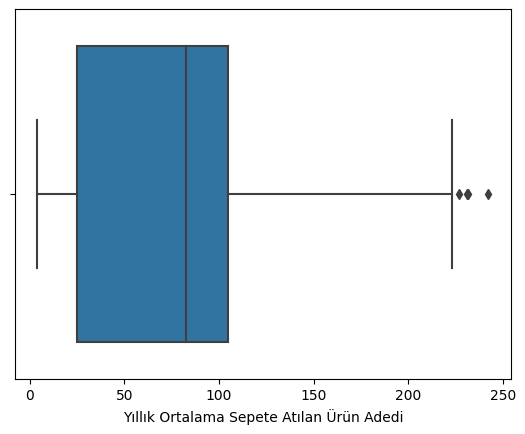

In [ ]:
x_train_yıllık_ort_sepete_atma= x_train["Yıllık Ortalama Sepete Atılan Ürün Adedi"]
sbn.boxplot(x=x_train_yıllık_ort_sepete_atma)

>len() fonksiyonunu ile görebileceğimiz gibi drop fonksiyonu çalıştıktan sonra x_train kümesinin boyutunda 4 indexlik bir azalma görülüyor. Azaltma işlemini aykırı verilerin tespitini yaparak gerçekleştirdik.

In [ ]:
len(x_train)

5460

Bulduğumuz aykırı değerleri verimizden çıkartıyoruz

In [ ]:
x_train.drop(labels=[1131,1880, 3309, 3684],inplace=True)


In [ ]:
len(x_train)

5456

#Grafik Analizi ile Veri Çıkartma

>Bu satırdaki kod numerik olarak ayrışmış kolonları, yeniden eski haline çevirmek için kullanıldı.

> Undummify fonksiyonunu, dummies fonksiyonunun tersini gösterebilmek için yazdık. Bilinçli olarak tercih ettik.

In [ ]:
def undummify(df, prefix_sep="_"):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

In [ ]:
sub_df=undummify(x_train, prefix_sep="_")


In [ ]:
sub_df

,index,Cinsiyet,Medeni Durum,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Yaş Grubu,Eğitim Düzeyi,İstihdam Durumu,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu
0,0,1,0,748266.440879,32010.900881,37.310644,1,obek_4,102.936904,31-40,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,Büyük Şehir,Elektronik ve Teknolojik Ürünler
1,1,0,1,246298.609605,4145.729891,11.554851,1,obek_5,82.176053,>60,Lise Mezunu,Kendi İşinin Sahibi,Küçük Şehir,Spor Malzemeleri
2,2,0,0,268582.732360,9924.379414,55.353236,0,obek_8,141.661426,18-30,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,Küçük Şehir,Giyim
3,3,0,1,327721.837865,6417.780714,15.417239,1,obek_3,17.097397,51-60,Lise Mezunu,Kendi İşinin Sahibi,Kırsal,Giyim
4,4,0,1,397431.626948,7886.663061,14.689837,1,obek_3,20.470459,31-40,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,Büyük Şehir,Giyim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,5455,1,0,478054.247819,43182.299801,31.356284,1,obek_6,51.600436,>60,Üniversite Mezunu,Emekli,Köy veya Kasaba,Kozmetik
5456,5456,0,1,481852.853651,42107.996193,26.288620,1,obek_6,49.190536,51-60,Doktora Ötesi,Kendi İşinin Sahibi,Köy veya Kasaba,Ev ve Mobilya
5457,5457,1,1,309443.687351,4655.392445,5.156906,1,obek_1,9.537384,51-60,İlkokul Mezunu,Düzenli ve Ücretli Bir İşi Var,Küçük Şehir,Ev ve Mobilya
5458,5458,1,0,266604.268016,9016.165906,39.205399,0,obek_8,143.281718,18-30,Yüksekokul Mezunu,Düzenli ve Ücretli Bir İşi Var,Büyük Şehir,Ev ve Mobilya


>Grafikte görüldüğü gibi Yıllık Ortalama Gelir'in 30000 ile 35000 arası ve Yıllık Ortalama Satın Alım Miktarı kolonunda 20000 ile 35000 arasındaki Yaş Grubu 51-60 ve 60 üstü olan bireylerin sayısı oldukça az.(Grafikte Kırmızı ve turuncu olarak gösterilen noktalar) Bu yüzden belirtilen aralığın birey sayısını hesaplayıp, indexleri ile veri setinden çıkardık.

<Axes: xlabel='Yıllık Ortalama Gelir', ylabel='Yıllık Ortalama Satın Alım Miktarı'>

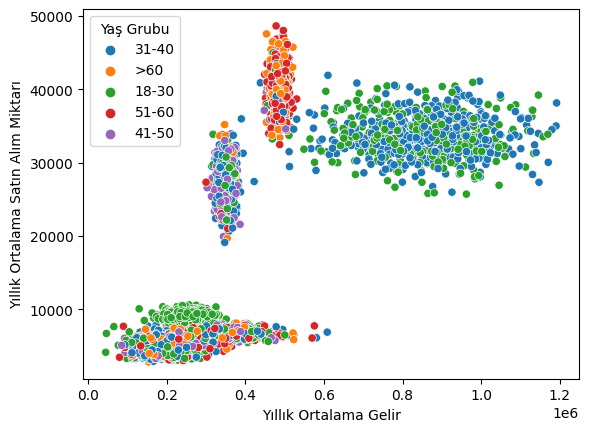

In [ ]:
sbn.scatterplot(x="Yıllık Ortalama Gelir" , y="Yıllık Ortalama Satın Alım Miktarı" , data=sub_df , hue="Yaş Grubu")

>Buradan 5-60 ve 60 üstü olan, belirtilen kriterleri sağlayan kişilerin sayısının analinizi görmekteyiz

In [ ]:
print("Çıkarılacak Veriler 1")
a=x_train[x_train["Yıllık Ortalama Satın Alım Miktarı"]<35000]
a=a[a["Yıllık Ortalama Satın Alım Miktarı"]>20000]
a=a[a["Yıllık Ortalama Gelir"]>300000]
a=a[a["Yıllık Ortalama Gelir"]<350000]
len(a)
a=a[a["Yaş Grubu_>60"]==1]
print(f"  20000 < Yıllık Ortalama Satın Alım Miktarı < 35000      \n  300000 < Yıllık Ortalama Gelir < 350000     \n  Yaş Grubu > 60       \n  Yukarıdaki kriterleri sağlayan kişilerin sayısı:{len(a)}\n\n\n")


print("Çıkarılacak Veriler 2")
b=x_train[x_train["Yıllık Ortalama Satın Alım Miktarı"]<35000]
b=b[b["Yıllık Ortalama Satın Alım Miktarı"]>20000]
b=b[b["Yıllık Ortalama Gelir"]>300000]
b=b[b["Yıllık Ortalama Gelir"]<350000]
len(b)
b=b[b["Yaş Grubu_51-60"]==1]


print(f"  20000 < Yıllık Ortalama Satın Alım Miktarı < 35000      \n  300000 < Yıllık Ortalama Gelir < 350000     \n  Yaş Grubu 51-60       \n  Yukarıdaki kriterleri sağlayan kişilerin sayısı:{len(b)}")

Çıkarılacak Veriler 1
  20000 < Yıllık Ortalama Satın Alım Miktarı < 35000      
  300000 < Yıllık Ortalama Gelir < 350000     
  Yaş Grubu > 60       
  Yukarıdaki kriterleri sağlayan kişilerin sayısı:10



Çıkarılacak Veriler 2
  20000 < Yıllık Ortalama Satın Alım Miktarı < 35000      
  300000 < Yıllık Ortalama Gelir < 350000     
  Yaş Grubu 51-60       
  Yukarıdaki kriterleri sağlayan kişilerin sayısı:15


In [ ]:
print(f"Çıkarılacak Veriler 1:\n{a.head(10).index}")
print("\n")
print(f"Çıkarılacak Veriler 2:\n{b.head(15).index}")


Çıkarılacak Veriler 1:
Int64Index([12, 172, 347, 522, 1553, 2002, 2681, 3190, 3394, 4081], dtype='int64')


Çıkarılacak Veriler 2:
Int64Index([ 189,  717, 1566, 1613, 2498, 2825, 3004, 3016, 3239, 3515, 3802,
            3836, 4328, 4439, 4944],
           dtype='int64')


In [ ]:
x_train.drop(labels=[189, 717, 1566,1613,2498,2825,3004,3016,3239,3515,3802,3836,4328,4439,4944],inplace=True)
x_train.drop(labels=[12,172,347,522,1553,2002,2681,3190,3394,4081],inplace=True)

In [ ]:
len(x_train)

5431

<Axes: xlabel='İstihdam Durumu', ylabel='Yıllık Ortalama Satın Alım Miktarı'>

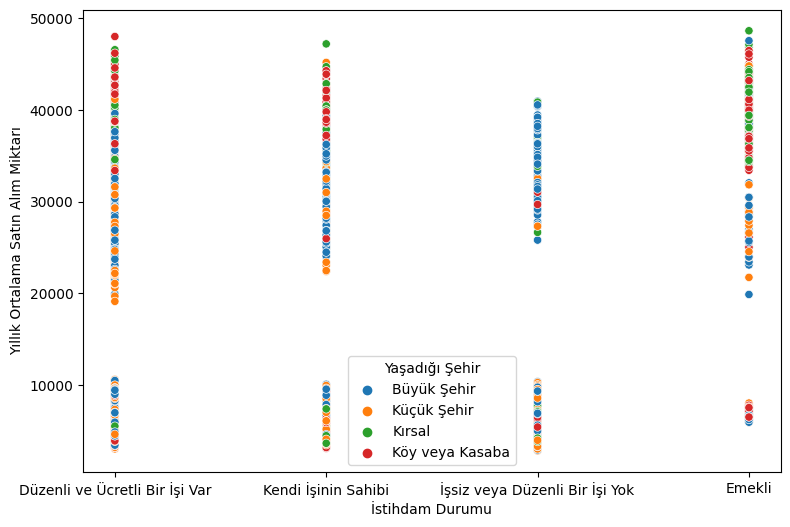

In [ ]:
plt.figure(figsize=(9, 6))

sbn.scatterplot(x="İstihdam Durumu" , y="Yıllık Ortalama Satın Alım Miktarı" , data=sub_df ,hue="Yaşadığı Şehir")

Belirlenen aykırı değer aralığının içinde bulunan kişi sayısının hesaplıyoruz.

In [ ]:
a=x_train[x_train["İstihdam Durumu_Emekli"]==1]
a=a[a["Yıllık Ortalama Satın Alım Miktarı"]<10000]
a=a[a["Yaşadığı Şehir_Köy veya Kasaba"]==1]
a.head(17)


,index,Cinsiyet,Medeni Durum,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Yaş Grubu_18-30,...,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Büyük Şehir,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Elektronik ve Teknolojik Ürünler,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri
952,952,0,1,351427.544311,7783.079817,14.571695,1,obek_3,19.583311,1,...,0,0,1,0,0,0,1,0,0,0
1220,1220,0,1,284279.896235,7499.534876,14.776592,1,obek_3,23.441817,0,...,0,0,1,0,0,0,1,0,0,0
1380,1380,0,1,237474.236260,6216.002850,13.119710,1,obek_3,25.638324,0,...,0,0,1,0,0,1,0,0,0,0
1430,1430,0,0,281536.629818,7212.124108,14.765902,1,obek_3,19.864209,0,...,0,0,1,0,0,0,0,1,0,0
1468,1468,1,0,250297.545792,6066.396817,15.914947,1,obek_3,21.289684,0,...,0,0,1,0,0,0,0,0,0,1
1864,1864,0,1,472402.785451,6252.197339,15.301485,1,obek_3,19.158936,0,...,0,0,1,0,0,0,1,0,0,0
1963,1963,1,1,334569.905158,7136.005589,15.247616,1,obek_3,18.388090,0,...,0,0,1,0,0,0,0,1,0,0
2018,2018,0,1,156174.584089,6626.792867,14.481958,1,obek_3,14.481958,0,...,0,0,1,0,0,0,0,0,0,1
2201,2201,0,1,223508.847535,6514.976067,15.749708,1,obek_3,22.463257,0,...,0,0,1,0,0,0,0,0,0,1
3210,3210,0,1,362837.396059,6334.483458,13.430039,1,obek_3,17.789101,0,...,0,0,1,0,0,1,0,0,0,0


Belirlenen aykırı değerlerin veri setinden çıkartıyoruz

In [ ]:
x_train.drop(labels=[952, 1220, 1380, 1430, 1468, 1864, 1963, 2018, 2201, 3210, 3224, 4299, 4418, 4461, 4823, 5232, 5416],inplace =True)

In [ ]:
x_train.shape

(5414, 36)

Veri setinde bulunan kişilerin Yıllık Ortalama Gelir ve  Eğitime Devam Etme Durumu arasındaki ilişkiye bağlı istihdam durumunu gözlemliyoruz

<Axes: xlabel='Yıllık Ortalama Gelir', ylabel='Eğitime Devam Etme Durumu'>

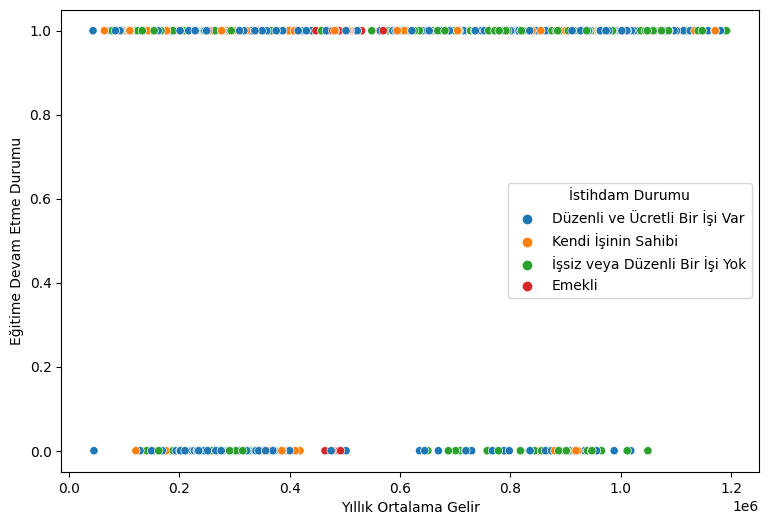

In [ ]:
plt.figure(figsize=(9, 6))

sbn.scatterplot(x="Yıllık Ortalama Gelir" , y="Eğitime Devam Etme Durumu" , data=sub_df ,hue="İstihdam Durumu")

Tespit edilen aralığın içinde bulunan kişi sayısını gözlemliyoruz.

In [ ]:
a=x_train[x_train["Yıllık Ortalama Gelir"]<100000]
a=a[a["Eğitime Devam Etme Durumu"]==0]
a=a[a["İstihdam Durumu_Düzenli ve Ücretli Bir İşi Var"]==1]
a.head()

,index,Cinsiyet,Medeni Durum,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Yaş Grubu_18-30,...,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Büyük Şehir,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Elektronik ve Teknolojik Ürünler,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri
5100,5100,0,1,45695.091498,6740.639692,15.557786,0,obek_3,16.284374,1,...,0,0,0,1,0,0,0,0,0,1


tespit edilen kişileri veri setinden çıkartıyoruz.

In [ ]:
x_train.drop(labels=[5100],inplace =True)

In [ ]:
x_train.shape

(5413, 36)

# **7-MinMax ÖLÇEKLEMESİ**

Veri setinde bulunan fazla değerlerin belirlenen değer aralığına sıkıştırılması için kullanıyoruz.

In [ ]:
X_train=x_train.drop("Öbek İsmi",axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(x_test)

In [ ]:
X_train[4]

array([7.32734933e-04, 0.00000000e+00, 1.00000000e+00, 3.07796501e-01,
       1.09897513e-01, 2.27339857e-01, 1.00000000e+00, 7.52238015e-02,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00])

# **8-EĞİTİM MODELLERİ**

# 1. Model-RANDOM FOREST

Eğitim kullanılan yapay zeka mimarisini(RandomForest)'yi çoklu sınıflandırmalarda diğer mimarilere göre daha iyi performanslar gösterdikleri için kullanıyoruz

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rfc=RandomForestClassifier(n_estimators=50,criterion="gini")

In [ ]:
x_train

,index,Cinsiyet,Medeni Durum,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Yaş Grubu_18-30,...,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Büyük Şehir,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Elektronik ve Teknolojik Ürünler,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri
0,0,1,0,748266.440879,32010.900881,37.310644,1,obek_4,102.936904,0,...,0,1,0,0,0,1,0,0,0,0
1,1,0,1,246298.609605,4145.729891,11.554851,1,obek_5,82.176053,0,...,0,0,0,1,0,0,0,0,0,1
2,2,0,0,268582.732360,9924.379414,55.353236,0,obek_8,141.661426,1,...,0,0,0,1,0,0,0,1,0,0
3,3,0,1,327721.837865,6417.780714,15.417239,1,obek_3,17.097397,0,...,0,0,0,0,1,0,0,1,0,0
4,4,0,1,397431.626948,7886.663061,14.689837,1,obek_3,20.470459,0,...,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,5455,1,0,478054.247819,43182.299801,31.356284,1,obek_6,51.600436,0,...,0,0,1,0,0,0,0,0,1,0
5456,5456,0,1,481852.853651,42107.996193,26.288620,1,obek_6,49.190536,0,...,0,0,1,0,0,0,1,0,0,0
5457,5457,1,1,309443.687351,4655.392445,5.156906,1,obek_1,9.537384,0,...,0,0,0,1,0,0,1,0,0,0
5458,5458,1,0,266604.268016,9016.165906,39.205399,0,obek_8,143.281718,1,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
rfc.fit(X_train,x_train["Öbek İsmi"])
y_pred=rfc.predict(X_test)

In [ ]:
y_pred

array(['obek_3', 'obek_3', 'obek_2', ..., 'obek_7', 'obek_5', 'obek_6'],
      dtype=object)

#2.Model--GRİD SEARCH

Bu modelde ekstra olarak modeli optimize etmek ve daha yüksek bir doğruluk değerine ulaşmak için GrşdSearchCV denilen bir hyper parametre kullanıyoruz.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=10)
grid_search.fit(X_train, x_train["Öbek İsmi"])

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred2 = best_model.predict(X_test)

#3.Model-KNeighborsClassifier

Bu moledle farklı olarak KNN yapay zeka mimarisi kullanılıyor ama %77 bir doğruluk değerinde bir doğruluk verdiği  için ilerleyen model aşamalarında kullanmıyoruz.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train,x_train["Öbek İsmi"])

KNeighborsClassifier()

In [ ]:
y_pred3 = model.predict(X_test)

# **9-CSV DOSYASI OLUŞTURMA**

Eğitilen modelin csv formatına dönüştürme işlemlerini gerçekleştiriyoruz.

In [ ]:
data = {
    'id': range(2340),
    'Öbek İsmi': y_pred
}
pred_Df = pd.DataFrame(data)
pred_Df.set_index('id', inplace=True)
pred_Df

,Öbek İsmi
id,
0,obek_3
1,obek_3
2,obek_2
3,obek_6
4,obek_1
...,...
2335,obek_8
2336,obek_2
2337,obek_7


In [ ]:
pred_Df.to_csv('/content/drive/MyDrive/datathon/DATATHON/output_klasoru/output_1.csv')